# Séance 1 / Introduction avec Pandas
Ceci est mon markdown de mes débuts sur Pandas

### Configuration de l'environnement de travail

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install geopandas #!pip permet de garder à jour le package même sur les machines

In [2]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données (tidyverse)
import matplotlib.pyplot as plt #Visualisation de données (dataviz et carto)
import geopandas as gpd #Gestion données sptiales (carto)
import os
import numpy as np
import shapely #(Les 3 autres premettent de faire le lien rentre tous)

## Importer un jeu de données

In [3]:
#Téléchargement des datas depuis le site opendata de Paris
!wget -O Espacesverts.csv https://opendata.paris.fr/explore/dataset/espaces_verts/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B
#wget permet de télécharger les datas.
#Espacesverts.csv est le nom du fichier que l'on donne aux données que l'on 
#télécharge. URL est celle d'un opendata (clickdroit sur l'emplacement de 
#téléchargement pour obtenir le lien) mais on peut aussi utiliser les APIs. 

--2023-03-12 10:21:19--  https://opendata.paris.fr/explore/dataset/espaces_verts/download/?format=csv
Resolving opendata.paris.fr (opendata.paris.fr)... 34.249.199.226, 34.248.20.69
Connecting to opendata.paris.fr (opendata.paris.fr)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘Espacesverts.csv’

Espacesverts.csv        [       <=>          ]  10.05M  5.87MB/s    in 1.7s    

2023-03-12 10:21:22 (5.87 MB/s) - ‘Espacesverts.csv’ saved [10541056]



## Exploration du jeux de données sur les espaces verts

[Téléchargement de la cheatsheet Pandas](https://studylib.net/doc/25268801/pandas-cheat-sheet)

In [ ]:
#Importer CSV to dataframe

Espacesverts = pd.read_csv("Espacesverts.csv", sep=';')
#Espacesverts = nom du dataframe comme dans R

Espacesverts.head()
#.head = view dans R (ici, un extrait)

,nsq_espace_vert,nom_ev,type_ev,categorie,adresse_numero,adresse_complement,adresse_typevoie,adresse_libellevoie,adresse_codepostal,poly_area,...,ouvert_ferme,id_division,id_atelier_horticole,ida3d_enb,site_villes,id_eqpt,competence,geom,url_plan,geom_x_y
0,10263,DECORATION DU BOULEVARD SAINT-MARCEL (5EME),Décorations sur la voie publique,Decoration,2.0,NaN,BOULEVARD,SAINT-MARCEL,75005,1259.0,...,NaN,113,18.0,JDE7191,SV,7191,CA,"{""coordinates"": [[[[2.355490546882123, 48.8380...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
1,117,SQUARE EUGENE VARLIN,Promenades ouvertes,Square,151.0,NaN,QUAI DE,JEMMAPES,75010,910.0,...,Oui,104,10.0,120389,3920,3582,CA,"{""coordinates"": [[[2.3662253295384845, 48.8784...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
2,10282,DECORATION DE L'AVENUE LOWENDAL,Décorations sur la voie publique,Decoration,1.0,TER,AVENUE DE,LOWENDAL,75007,337.0,...,NaN,101,6.0,JDE7211,SV,7211,CA,"{""coordinates"": [[[[2.3092731713525896, 48.853...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
3,10003,CIMETIERE PARISIEN DE BAGNEUX,Cimetières,Cimetière,45.0,NaN,AVENUE,MARX DORMOY,92220,629154.0,...,Non,12,153.0,72585,A92007,5083,CP,"{""coordinates"": [[[2.3073749120727873, 48.8100...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN
4,11513,JARDIN PARTAGE LES JARDINS PASSAGERS,"Ephémères, partagés, pédagogiques",Jardin partage,5.0,NaN,PLACE DE LA,FONTAINE AUX LIONS,75019,2107.0,...,Non,119,41.0,0,294,6689,CP,"{""coordinates"": [[[2.388700480782764, 48.89095...",http://p70-planet.apps.paris.mdp/Advitium/Appe...,NaN


In [ ]:
#Afficher le type de chaque champ du dataframe

Espacesverts.dtypes #.dtypes permet de voir le type du champ

nsq_espace_vert            int64
nom_ev                    object
type_ev                   object
categorie                 object
adresse_numero           float64
adresse_complement        object
adresse_typevoie          object
adresse_libellevoie       object
adresse_codepostal         int64
poly_area                float64
surface_totale_reelle    float64
surface_horticole        float64
presence_cloture          object
perimeter                float64
annee_ouverture          float64
annee_renovation         float64
ancien_nom_ev             object
annee_changement_nom     float64
nb_entites               float64
ouvert_ferme              object
id_division                int64
id_atelier_horticole     float64
ida3d_enb                 object
site_villes               object
id_eqpt                   object
competence                object
geom                      object
url_plan                  object
geom_x_y                 float64
dtype: object

In [ ]:
#Compter le nombre d'enregistrements

Espacesverts['nsq_espace_vert'].size
#.size permet de compter le nombre de lignes sur le champs id du dataframe
#(ici, nsq_espaces_verts)

2242

In [ ]:
#Réorganiser la table (sélection des colonnes importantes)

EspacesvertsOk = Espacesverts[["nsq_espace_vert", "nom_ev", "categorie", "adresse_codepostal", "surface_totale_reelle", "annee_ouverture"]]
#Nom du nv dataframe = ancien[["nom des champs",...]]

EspacesvertsOk.head()
#La ligne permet de tjr montrer un extrait le dataframe

,nsq_espace_vert,nom_ev,categorie,adresse_codepostal,surface_totale_reelle,annee_ouverture
0,10263,DECORATION DU BOULEVARD SAINT-MARCEL (5EME),Decoration,75005,1209.0,NaN
1,117,SQUARE EUGENE VARLIN,Square,75010,975.0,1891.0
2,10282,DECORATION DE L'AVENUE LOWENDAL,Decoration,75007,338.0,NaN
3,10003,CIMETIERE PARISIEN DE BAGNEUX,Cimetière,92220,615200.0,1886.0
4,11513,JARDIN PARTAGE LES JARDINS PASSAGERS,Jardin partage,75019,2000.0,2009.0


In [ ]:
# Renommer les noms des champs

EspacesvertsOk.rename(columns={'nsq_espace_vert': 'id','nom_ev': 'nom','adresse_codepostal': 'CodePostal', 'surface_totale_reelle' : 'surface', 'annee_ouverture': 'ouverture'}, inplace=True)
#.rename pour renommer et on renomme par ancien nom : nv nom

EspacesvertsOk.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,nom,categorie,CodePostal,surface,ouverture
0,10263,DECORATION DU BOULEVARD SAINT-MARCEL (5EME),Decoration,75005,1209.0,NaN
1,117,SQUARE EUGENE VARLIN,Square,75010,975.0,1891.0
2,10282,DECORATION DE L'AVENUE LOWENDAL,Decoration,75007,338.0,NaN
3,10003,CIMETIERE PARISIEN DE BAGNEUX,Cimetière,92220,615200.0,1886.0
4,11513,JARDIN PARTAGE LES JARDINS PASSAGERS,Jardin partage,75019,2000.0,2009.0


In [ ]:
#Changer le type d'une colonne

EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(str)
#Nom du df['nom du champ']= nom df ['nom du champ'].astype(type voulu)

EspacesvertsOk.dtypes

<ipython-input-18-76f35cf748fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['id'] = EspacesvertsOk['id'].astype(str)


id             object
nom            object
categorie      object
CodePostal      int64
surface       float64
ouverture     float64
dtype: object

In [ ]:
# Concaténer des champs

EspacesvertsOk["concat"] = EspacesvertsOk["categorie"] + " - " + EspacesvertsOk["nom"]
#Création d'un nv champs dans le df = concat des deux champs avec - en sep.
EspacesvertsOk.head()

<ipython-input-19-bd9ae6b32d9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk["concat"] = EspacesvertsOk["categorie"] + " - " + EspacesvertsOk["nom"]


,id,nom,categorie,CodePostal,surface,ouverture,concat
0,10263,DECORATION DU BOULEVARD SAINT-MARCEL (5EME),Decoration,75005,1209.0,NaN,Decoration - DECORATION DU BOULEVARD SAINT-MAR...
1,117,SQUARE EUGENE VARLIN,Square,75010,975.0,1891.0,Square - SQUARE EUGENE VARLIN
2,10282,DECORATION DE L'AVENUE LOWENDAL,Decoration,75007,338.0,NaN,Decoration - DECORATION DE L'AVENUE LOWENDAL
3,10003,CIMETIERE PARISIEN DE BAGNEUX,Cimetière,92220,615200.0,1886.0,Cimetière - CIMETIERE PARISIEN DE BAGNEUX
4,11513,JARDIN PARTAGE LES JARDINS PASSAGERS,Jardin partage,75019,2000.0,2009.0,Jardin partage - JARDIN PARTAGE LES JARDINS PA...


In [ ]:
#Diviser un champ
EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)
#Transformation en chaine de caractère
EspacesvertsOk['Arrondissement'] = EspacesvertsOk['CodePostal'].str[-2:]
#Création d'un nv champs avec concat des deux derniers .str[-2:]
#Si deux premiers faire .str[:2]
EspacesvertsOk.head()

<ipython-input-20-78f0d682bcff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['CodePostal'] = EspacesvertsOk['CodePostal'].astype(str)
<ipython-input-20-78f0d682bcff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EspacesvertsOk['Arrondissement'] = EspacesvertsOk['CodePostal'].str[-2:]


,id,nom,categorie,CodePostal,surface,ouverture,concat,Arrondissement
0,10263,DECORATION DU BOULEVARD SAINT-MARCEL (5EME),Decoration,75005,1209.0,NaN,Decoration - DECORATION DU BOULEVARD SAINT-MAR...,05
1,117,SQUARE EUGENE VARLIN,Square,75010,975.0,1891.0,Square - SQUARE EUGENE VARLIN,10
2,10282,DECORATION DE L'AVENUE LOWENDAL,Decoration,75007,338.0,NaN,Decoration - DECORATION DE L'AVENUE LOWENDAL,07
3,10003,CIMETIERE PARISIEN DE BAGNEUX,Cimetière,92220,615200.0,1886.0,Cimetière - CIMETIERE PARISIEN DE BAGNEUX,20
4,11513,JARDIN PARTAGE LES JARDINS PASSAGERS,Jardin partage,75019,2000.0,2009.0,Jardin partage - JARDIN PARTAGE LES JARDINS PA...,19


In [ ]:
# Filtrer les données

# Selectioner selon une modalité d'une variable
Jardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin')]

# Sélectionner selon deux modalité d'une variable (OR)
Squaresetjardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin') | (EspacesvertsOk["categorie"] == 'Square')]

# Selectioner selon une valeur numérique
Grandespacesverts = EspacesvertsOk[(EspacesvertsOk["surface"] >10000)]

#Sélectionner selon les modalités de deux variables (AND)
Squares15eme = EspacesvertsOk[(EspacesvertsOk["Arrondissement"] == 75015) & (EspacesvertsOk["categorie"] == 'Square')]

# Sélectioner toute les modalités sauf une (clause NOT)
Toussaufjardins = EspacesvertsOk[~(EspacesvertsOk["categorie"] == 'Jardin')]

In [ ]:
#Exercice 1
#nb espaces verts dans le premier ou le deuxieme arrondissement
EV01et02 = EspacesvertsOk[(EspacesvertsOk["Arrondissement"] == '01') | (EspacesvertsOk["Arrondissement"] == '02')]
EV01et02.size

328

In [ ]:
#Exercice 2
#nb espaces verts dans le premier ou le deuxieme arrondissement qui sont des jardins et des squares
EspacesvertsOk[((EspacesvertsOk["Arrondissement"] == '01') | (EspacesvertsOk["Arrondissement"] == '02')) & ((EspacesvertsOk["categorie"] == 'Jardin') | (EspacesvertsOk["categorie"] == 'Square'))].size

56

In [ ]:
#Compter le nombre d'enregistrement des sélections

Jardins['id'].size

203

In [ ]:
#Sélectionner selon les modalités de deux variables (AND)
Squares15eme = EspacesvertsOk[(EspacesvertsOk["Arrondissement"] == '15') & (EspacesvertsOk["categorie"] == 'Square')]
Squares15eme.head()

,id,nom,categorie,CodePostal,surface,ouverture,concat,Arrondissement
108,352,SQUARE ALLERAY - SAINT-AMAND,Square,75015,3483.0,1975.0,Square - SQUARE ALLERAY - SAINT-AMAND,15
110,330,SQUARE VIOLET,Square,75015,9550.0,1876.0,Square - SQUARE VIOLET,15
111,338,SQUARE DU CARDINAL VERDIER,Square,75015,6530.0,1931.0,Square - SQUARE DU CARDINAL VERDIER,15
299,359,SQUARE PABLO CASALS,Square,75015,5898.0,1979.0,Square - SQUARE PABLO CASALS,15
301,333,SQUARE JEAN CHERIOUX,Square,75015,3980.0,1896.0,Square - SQUARE JEAN CHERIOUX,15


,Nb
categorie,
Arboretum,1
Terre-plein,1
Archipel,1
Bois,2
Ile,2


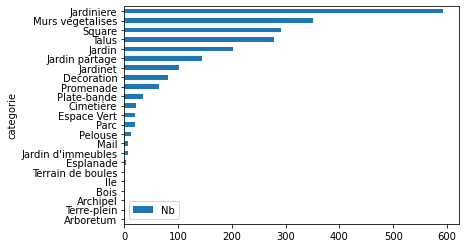

In [ ]:
#Regrouper les espaces verts par catégorie avec comptage (GROUP BY)

Categorie = EspacesvertsOk[["categorie", "id"]].groupby("categorie").count()
#Sélectionne les deux champs on groupe par catégorie et on dénombre les id par catégorie
Categorie.rename(columns={"id": "Nb"}, inplace=True)
#On renomme id en Nb
Categorie = Categorie.sort_values("Nb", ascending=True)
#On les range dans l'ordre croissant
Categorie.plot(kind="barh")
#Création d'un graphe en bar horizontal
Categorie.head()
#Tjr demander le graph avant la table car sinon que le graphe s'affiche

In [ ]:
# Ne garder que les types principaux

Categorie = Categorie[(Categorie["Nb"] >10)]
#On garde les categories ou il y a plus de 10 individus
Categorie.head()

,Nb
categorie,
Pelouse,12
Parc,19
Espace Vert,20
Cimetière,21
Plate-bande,35


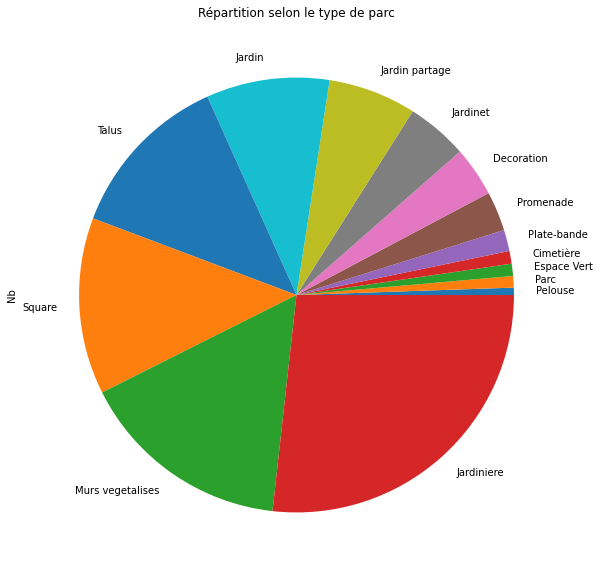

In [ ]:
# Diagramme circulaire des types d'espaces verts

Categorie.plot.pie(y='Nb', figsize=(10, 10), legend=False)
plt.title('Répartition selon le type de parc')
plt.show()

# Aller plus loin dans les graphiques

[Exemples de graphiques](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

[Gallery](https://www.python-graph-gallery.com/)

<AxesSubplot:xlabel='categorie'>

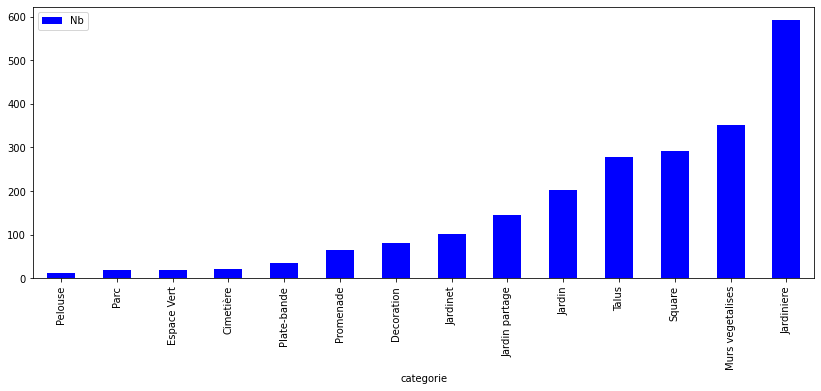

In [ ]:
#Diagramme des catégories en barres

Categorie = Categorie.sort_values("Nb", ascending=True)
Categorie.plot(figsize =(14,5), kind="bar", color = "blue")


In [ ]:
#Ne garder que les arrondissement de Paris

EspacevertsParis = EspacesvertsOk[(EspacesvertsOk["CodePostal"].str.contains("75"))]
#Equivalent du like dans le SQL
EspacevertsParis = EspacevertsParis[(EspacevertsParis["surface"] >1)]
# Ne garder que les types supérieurs à 1
EspacevertsParis.head()
EspacevertsParis["id"].size #2232

1687

In [ ]:
# Calculer la surface moyenne des squares

Squares = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Square')]
#On isole les squares 
Squares["surface"].mean()
#On calcule la moyenne des surfaces

4193.604810996563

In [ ]:
# Calculer la surface moyenne des jardins

Jardins = EspacesvertsOk[(EspacesvertsOk["categorie"] == 'Jardin')]
Jardins["surface"].mean()

8805.366834170854

,surface
categorie,
Murs vegetalises,91.335484
Jardiniere,282.669960
Decoration,315.975309
Jardin partage,364.354167
Jardinet,627.188119


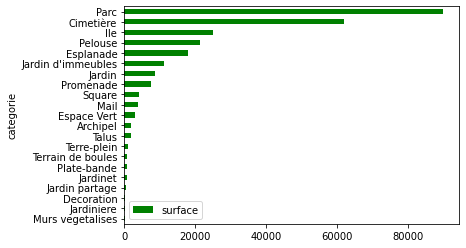

In [ ]:
# Calculer la surface moyenne de chaque type d'espace vert

SurfaceType = EspacevertsParis[["categorie", "surface"]].groupby("categorie").mean()
SurfaceType = SurfaceType.sort_values("surface", ascending=True)
#moyenne des surfaces par catégorie
SurfaceType.plot(kind="barh", color = "green")
SurfaceType.head()

Text(0, 0.5, 'Surface espaces verts')

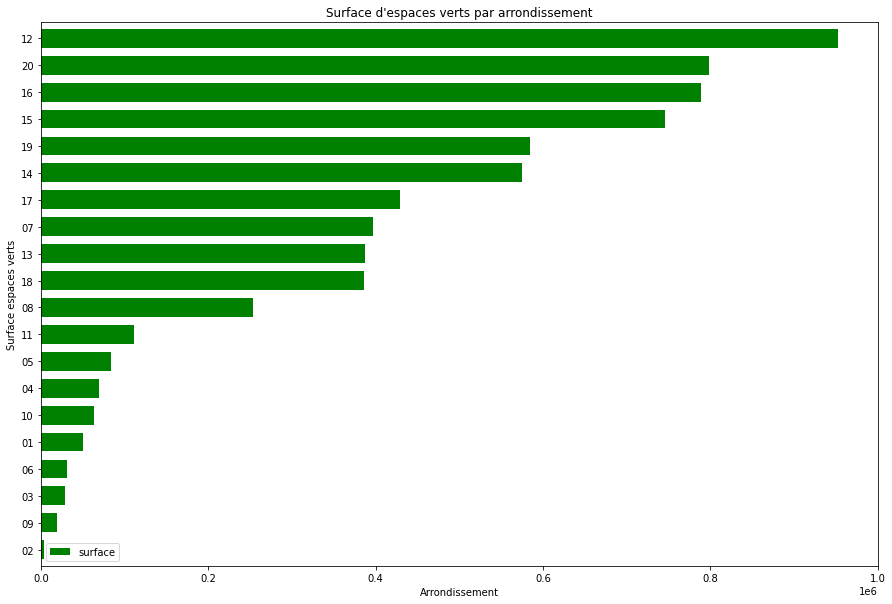

In [ ]:
#Calculer la superficie des espaces vert par arrondissement (agrégation statistique)

SurfaceEspacevertARDT = EspacevertsParis[["Arrondissement", "surface"]].groupby("Arrondissement").sum()
SurfaceEspacevertARDT = SurfaceEspacevertARDT.sort_values("surface", ascending=True)
SurfaceEspacevertARDT.plot(figsize =(15,10), kind="barh", color= "green", width=0.7)
plt.title("Surface d'espaces verts par arrondissement")
plt.xlabel("Arrondissement")
plt.ylabel("Surface espaces verts")

# Exercices autour du jeu de données des arbres

[Opendata des arbres de Paris](https://opendata.paris.fr/explore/dataset/les-arbres/information/?disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable)

* Importer le dataset des arbres
* Compter le nombre d'abres
* Restructurer le jeu de données (sélection de variables et renommage) > "idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "geo_point_2d"
* Proposer une visualisation du nb d'arbres par arrondissement
* Proposer une visualisation du nb d'arbres par domanialité
* Proposer une visualisation de la hauteur moyenne par type
* Proposer une visualisation de la hauteur moyenne par arrondissement
* Créer un géodataframe
* Faire une carte avec uniquement les chênes, les erables et les frênes

In [ ]:
#Téléchargement des données 
!wget -O Arbres.csv https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/les-arbres/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B

In [ ]:
#Importer CSV to dataframe

arbres = pd.read_csv("Arbres.csv", sep=';')
arbres.head()

,idbase,typeemplacement,domanialite,arrondissement,complementadresse,numero,adresse,idemplacement,libellefrancais,genre,espece,varieteoucultivar,circonferenceencm,hauteurenm,stadedeveloppement,remarquable,geo_point_2d
0,205652,Arbre,Alignement,PARIS 8E ARRDT,NaN,NaN,COURS ALBERT 1ER,000402005,Marronnier,Aesculus,hippocastanum,NaN,106,10,Adulte,NON,"48.864756348264784, 2.3053579684725705"
1,240414,Arbre,Jardin,PARIS 14E ARRDT,NaN,NaN,JARDIN DE LA PLACE GILBERT PERROY / 2 PLACE GI...,000107001,Orme,Ulmus,n. sp.,NaN,140,10,Jeune (arbre)Adulte,NON,"48.83220295634672, 2.325645809135856"
2,111500,Arbre,Jardin,PARIS 17E ARRDT,Aire de Jeu des Grands,NaN,PARC CLICHY BATIGNOLLES MARTIN LUTHER KING / 1...,F00207004,Arbre à miel,Tetradium,daniellii,NaN,55,5,Jeune (arbre)Adulte,NON,"48.89070845363805, 2.3145228803252005"
3,135994,Arbre,Jardin,PARIS 15E ARRDT,NaN,NaN,SQUARE JEAN COCTEAU / 122 AVENUE FELIX FAURE,000107012,Erable,Acer,pseudoplatanus,NaN,98,0,NaN,NON,"48.83888439749845, 2.2806139896705675"
4,139206,Arbre,Jardin,PARIS 16E ARRDT,NaN,NaN,JARDIN DE LA PLACE DU MARECHAL DELATTRE DE TAS...,000101089,Sorbier,Sorbus,decora,NaN,40,3,Jeune (arbre),NON,"48.87130382516166, 2.275388784027277"


In [ ]:
#Dénombrer le nombre d'arbres 
arbres['domanialite'].size

207049

In [ ]:
#Réorganiser la table 
arbresok = arbres[["idbase", "domanialite", "arrondissement", "libellefrancais", "hauteurenm", "circonferenceencm", "remarquable", "geo_point_2d"]]
arbresok.head()

,idbase,domanialite,arrondissement,libellefrancais,hauteurenm,circonferenceencm,remarquable,geo_point_2d
0,205652,Alignement,PARIS 8E ARRDT,Marronnier,10,106,NON,"48.864756348264784, 2.3053579684725705"
1,240414,Jardin,PARIS 14E ARRDT,Orme,10,140,NON,"48.83220295634672, 2.325645809135856"
2,111500,Jardin,PARIS 17E ARRDT,Arbre à miel,5,55,NON,"48.89070845363805, 2.3145228803252005"
3,135994,Jardin,PARIS 15E ARRDT,Erable,0,98,NON,"48.83888439749845, 2.2806139896705675"
4,139206,Jardin,PARIS 16E ARRDT,Sorbier,3,40,NON,"48.87130382516166, 2.275388784027277"


In [ ]:
# Renommer les champs

arbresok.rename(columns={'idbase': 'id','libellefrancais': 'type','hauteurenm': 'hauteur', 'circonferenceencm': 'circonference'}, inplace=True)
arbresok.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,domanialite,arrondissement,type,hauteur,circonference,remarquable,geo_point_2d
0,205652,Alignement,PARIS 8E ARRDT,Marronnier,10,106,NON,"48.864756348264784, 2.3053579684725705"
1,240414,Jardin,PARIS 14E ARRDT,Orme,10,140,NON,"48.83220295634672, 2.325645809135856"
2,111500,Jardin,PARIS 17E ARRDT,Arbre à miel,5,55,NON,"48.89070845363805, 2.3145228803252005"
3,135994,Jardin,PARIS 15E ARRDT,Erable,0,98,NON,"48.83888439749845, 2.2806139896705675"
4,139206,Jardin,PARIS 16E ARRDT,Sorbier,3,40,NON,"48.87130382516166, 2.275388784027277"


In [ ]:
#Valeur maximales des hauteurs des arbres
arbresok["hauteur"].max()

90

In [ ]:
#Valeur maximales des circonférences des arbres 
arbresok["circonference"].max()

97110

In [ ]:
#Nettoyage du dataframe

arbresok = arbresok[(arbresok["circonference"] <= 500)]
arbresok = arbresok[(arbresok["hauteur"] <= 30)]
arbresok["id"].size

206939

In [ ]:
#Valeur maximales des hauteurs des arbres
arbresok["hauteur"].max()

30

In [ ]:
#Valeur maximales des circonférences des arbres 
arbresok["circonference"].max()

500

In [ ]:
#Création d'un dataframe avec les arbres remarquables

arbresremarquables = arbresok[(arbresok["remarquable"] == 'OUI')]
arbresremarquables['id'].size

152

,id
arrondissement,
PARIS 10E ARRDT,1
PARIS 11E ARRDT,1
PARIS 6E ARRDT,1
PARIS 1ER ARRDT,1
PARIS 9E ARRDT,2


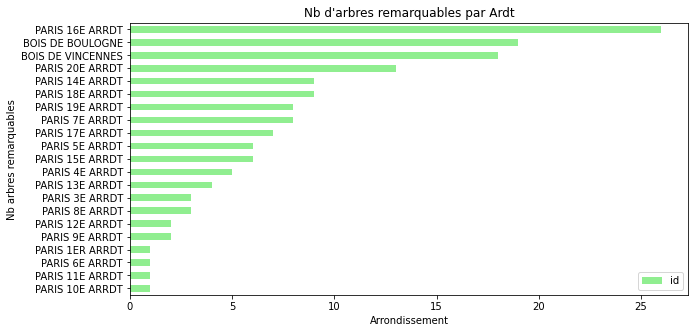

In [ ]:
#Compter le nombre d'arbres remarquables par arrondissement de Paris

arbresremarquableardt = arbresremarquables[["arrondissement", "id"]].groupby("arrondissement").count()
arbresremarquableardt = arbresremarquableardt.sort_values("id", ascending=True)
arbresremarquableardt.plot(figsize =(10,5), kind="barh", color = "lightgreen")
plt.title("Nb d'arbres remarquables par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Nb arbres remarquables")
arbresremarquableardt.head()

In [ ]:
#Liste des varaibles du type d'arbres

arbresok[('type')].unique()

,hauteur
arrondissement,
HAUTS-DE-SEINE,2.280629
SEINE-SAINT-DENIS,5.020636
PARIS 15E ARRDT,6.514671
VAL-DE-MARNE,7.100437
PARIS 1ER ARRDT,8.235505


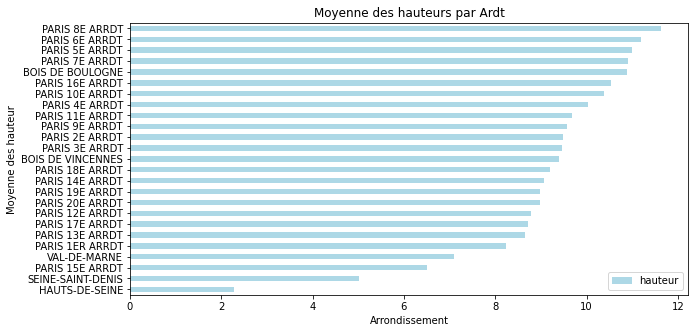

In [ ]:
#Calcul de la hauteur moyenne des arbres par arrondissement

arbreshauteurardt = arbresok[["arrondissement", "hauteur"]].groupby("arrondissement").mean()
arbreshauteurardt = arbreshauteurardt.sort_values("hauteur", ascending=True)
arbreshauteurardt.plot(figsize =(10,5), kind="barh", color = "lightblue")
plt.title("Moyenne des hauteurs par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Moyenne des hauteurs")
arbreshauteurardt.head()

,circonference
arrondissement,
HAUTS-DE-SEINE,19.756088
SEINE-SAINT-DENIS,55.257749
VAL-DE-MARNE,65.752547
PARIS 15E ARRDT,68.077857
PARIS 9E ARRDT,72.750183


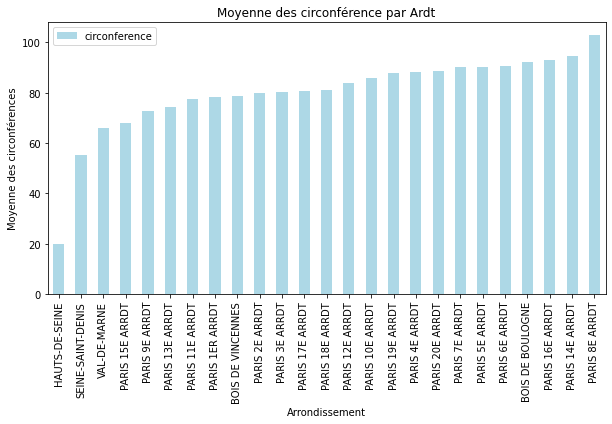

In [ ]:
#Calcul de la circonférence moyenne des arbres par arrondissement

arbrescirconfardt = arbresok[["arrondissement", "circonference"]].groupby("arrondissement").mean()
arbrescirconfardt = arbrescirconfardt.sort_values("circonference", ascending=True)
arbrescirconfardt.plot(figsize =(10,5), kind="bar", color = "lightblue")
plt.title("Moyenne des circonférence par Ardt")
plt.xlabel("Arrondissement")
plt.ylabel("Moyenne des circonférences")
arbrescirconfardt.head()

Text(0, 0.5, 'Moyenne des hauteurs')

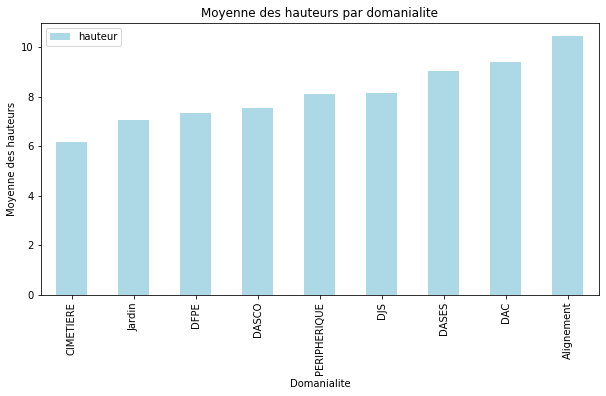

In [ ]:
#Hauteur moyenne par domanialité

arbreshauteurdom = arbresok[["domanialite", "hauteur"]].groupby("domanialite").mean()
arbreshauteurdom = arbreshauteurdom.sort_values("hauteur", ascending=True)
arbreshauteurdom.plot(figsize =(10,5), kind="bar", color = "lightblue")
plt.title("Moyenne des hauteurs par domanialite")
plt.xlabel("Domanialite")
plt.ylabel("Moyenne des hauteurs")

Text(0, 0.5, 'Moyenne des hauteurs')

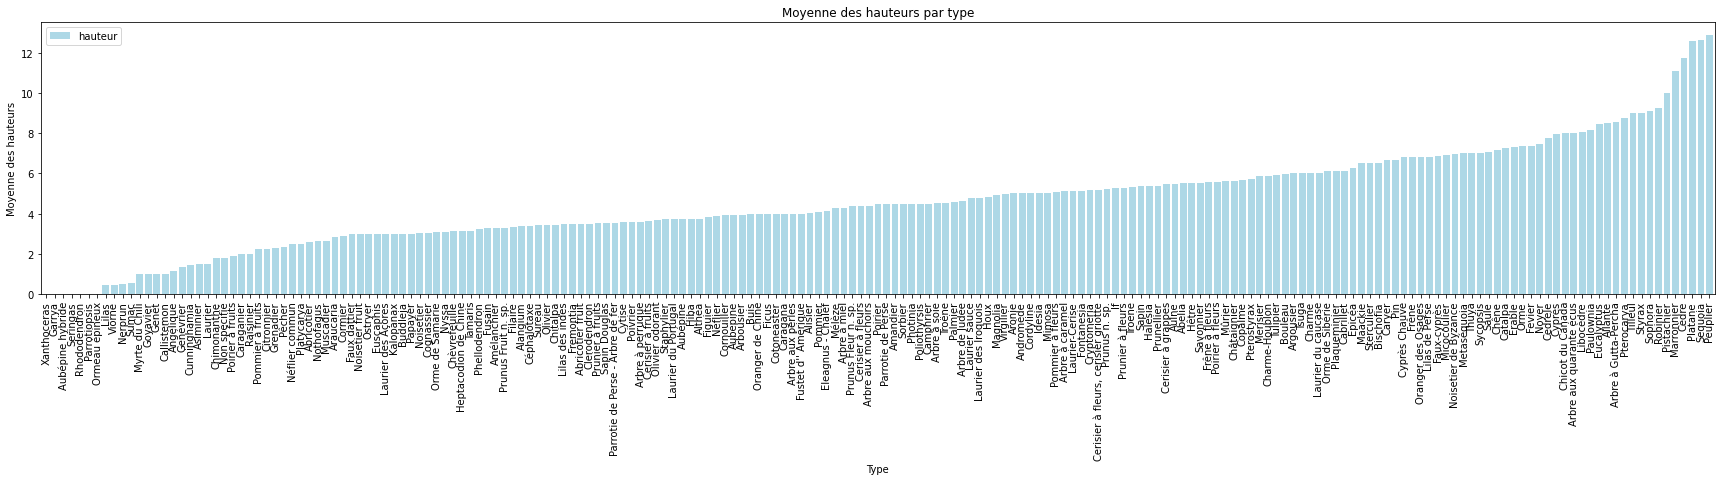

In [ ]:
#Hauteur moyenne par type

arbreshauteurtype = arbresok[["type", "hauteur"]].groupby("type").mean()
arbreshauteurtype = arbreshauteurtype.sort_values("hauteur", ascending=True)
arbreshauteurtype.plot(figsize =(30,5), kind="bar", color = "lightblue", width =0.8)
plt.title("Moyenne des hauteurs par type")
plt.xlabel("Type")
plt.ylabel("Moyenne des hauteurs")

<AxesSubplot:xlabel='hauteur', ylabel='circonference'>

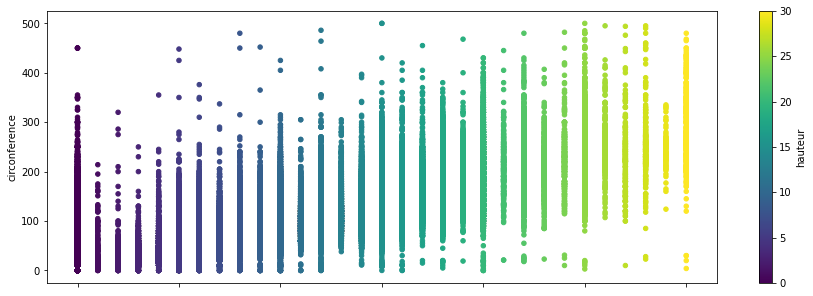

In [ ]:
#Nuage de points rapport entre hauteur et circonférence
arbresok.plot(figsize =(15,5), kind="scatter", x="hauteur", y= "circonference", c='hauteur', cmap='viridis')

In [ ]:
#Import de la librarie pour la treemap
!pip install squarify
import squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


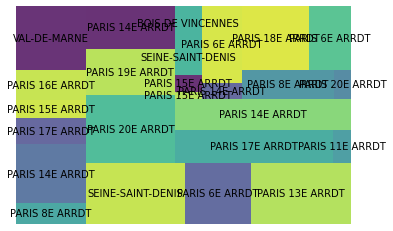

In [ ]:
#Treemap des hauteurs par arrondissmeent
arbresardt = arbresok[["arrondissement", "id"]].groupby("arrondissement").count()

squarify.plot(sizes=arbresardt['id'], label=arbresok['arrondissement'], alpha=.8 )
plt.axis('off')
plt.show()